In [1]:
%load_ext autoreload
%autoreload 2

# CW/CCW vertex colorings

We are trying to look at how degenerate colorings can be described in terms of clockwise and anticlockwise colorings of the vertices. Start with a lattice

/var/folders/v4/z7wcc4gj6clczcj6vr8b9dvw0000gn/T/ipykernel_77988/2144855894.py:14: DeprecationWarning: Call to deprecated function plot_lattice.
  pl.plot_lattice(lattice, ax= ax )


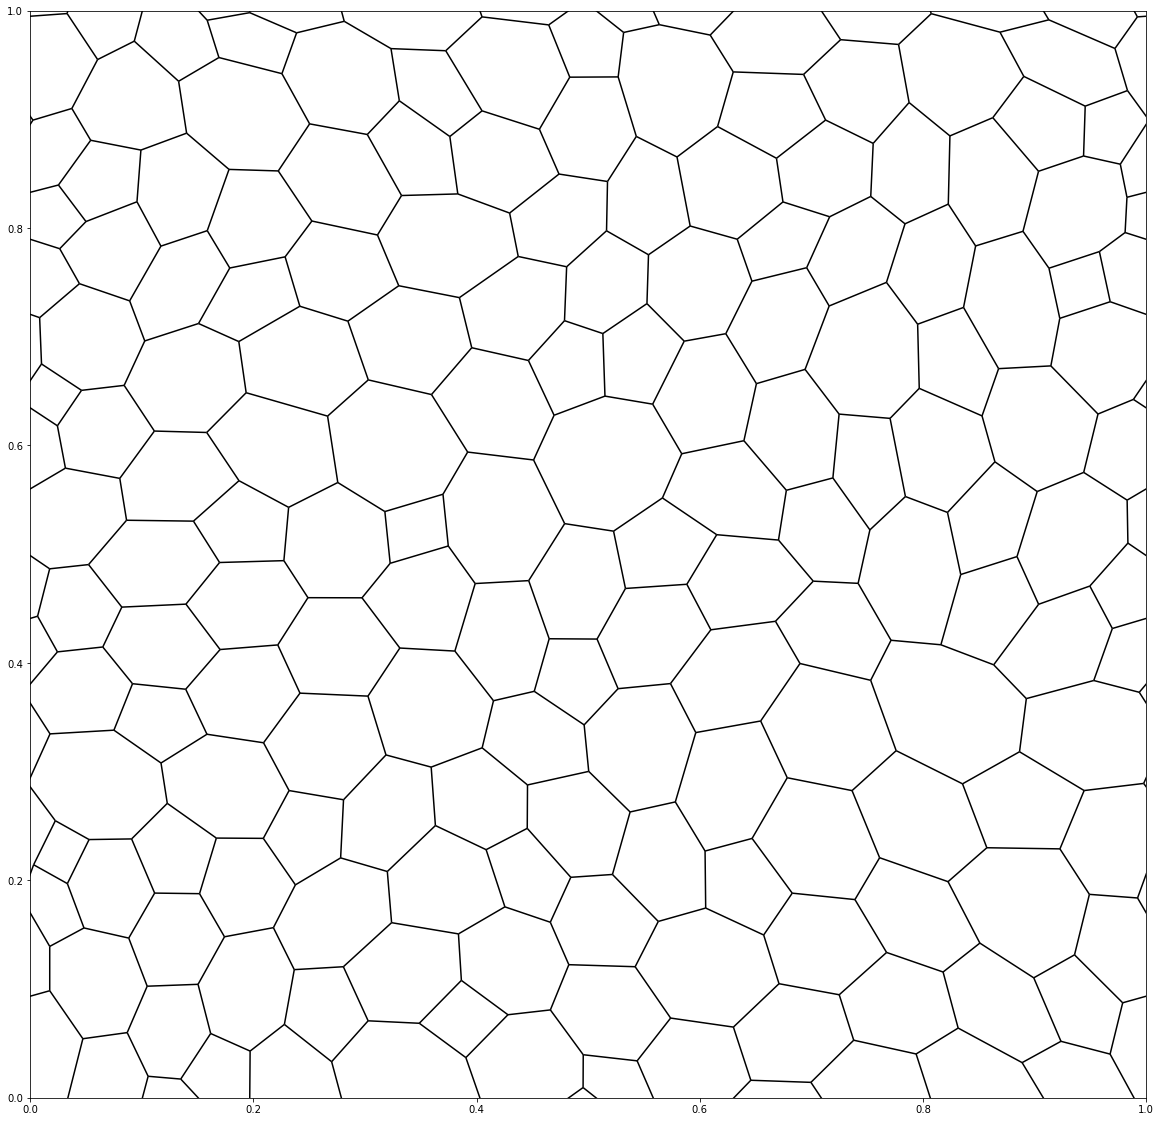

Lattice(318 vertices, 477 edges)

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from koala.pointsets import bluenoise
from koala.voronization import generate_lattice
from koala import plotting as pl

n_centers_along_axes = 15


centers = bluenoise(30, n_centers_along_axes, n_centers_along_axes)
# centers = generate_random(50)
lattice = generate_lattice(centers, shift_vertices=True)
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
pl.plot_lattice(lattice, ax=ax)
plt.show()
lattice

In [4]:
from koala.graph_utils import clockwise_edges_about
from koala import graph_color

n_colorings_to_find = 3


ordered_edge_indices = clockwise_edges_about(vertex_index=0, g=lattice)


adj = lattice.edges.indices
a, edge_colorings = graph_color.edge_color(
    lattice, n_solutions=n_colorings_to_find, fixed=enumerate(ordered_edge_indices)
)

In [5]:
# find edge colorings
def find_parity(input_colors):
    p = 2 - (input_colors[2] - input_colors[0]) % 3
    return p


point_colorings = edge_colorings[:, np.array(lattice.vertices.adjacent_edges)]
vertex_colorings = np.apply_along_axis(find_parity, 2, point_colorings)

Here we can check that the vertex coloring does actually correspond to the correct orientation in terms of edge colorings

/var/folders/v4/z7wcc4gj6clczcj6vr8b9dvw0000gn/T/ipykernel_77988/1706971187.py:4: DeprecationWarning: Call to deprecated function plot_lattice.
  pl.plot_lattice(


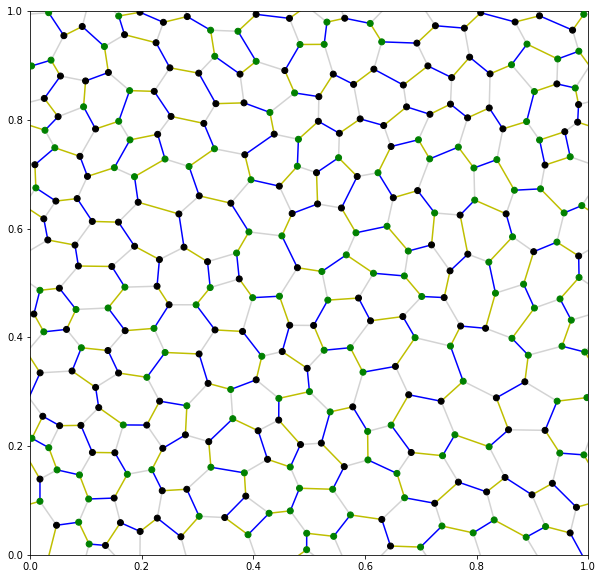

In [6]:
coloring_to_plot = 0

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
pl.plot_lattice(
    lattice,
    ax=ax,
    edge_labels=edge_colorings[coloring_to_plot],
    vertex_labels=vertex_colorings[coloring_to_plot],
    edge_color_scheme=["lightgrey", "y", "b", "lightgrey"],
    vertex_color_scheme=["g", "k"],
)
plt.show()

/var/folders/v4/z7wcc4gj6clczcj6vr8b9dvw0000gn/T/ipykernel_77988/2771994371.py:24: DeprecationWarning: Call to deprecated function plot_lattice.
  pl.plot_lattice(
/var/folders/v4/z7wcc4gj6clczcj6vr8b9dvw0000gn/T/ipykernel_77988/2771994371.py:32: DeprecationWarning: Call to deprecated function plot_lattice.
  pl.plot_lattice(


Text(0.5, 1.0, 'original coloring')

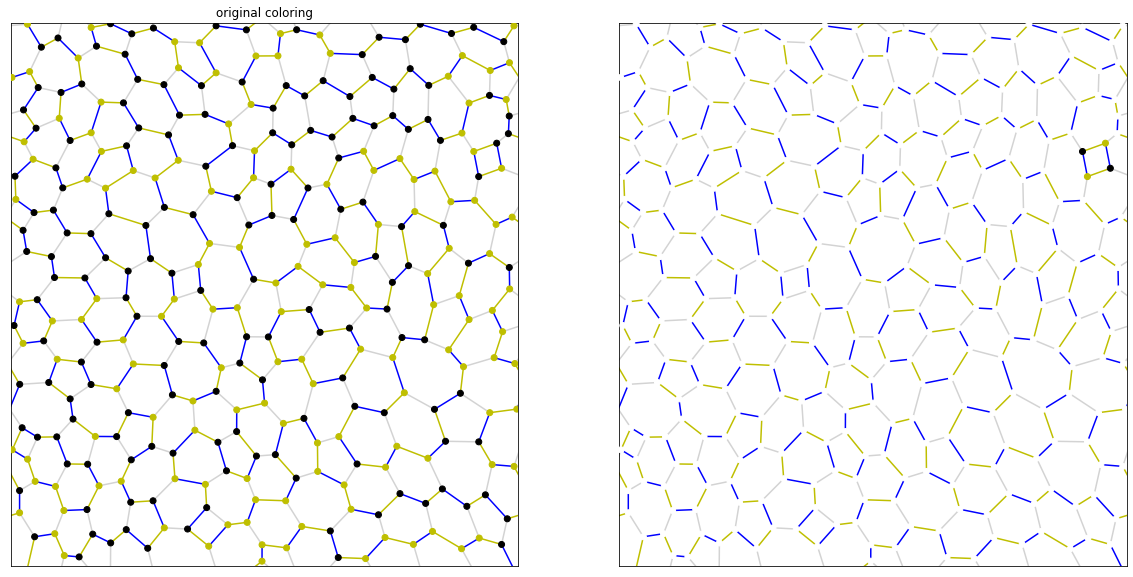

In [7]:
comparison_index = 0
figure_dimension = 10


def compare_to_zero(row_to_compare):
    reference = vertex_colorings[comparison_index]
    row_mask = row_to_compare != reference
    # print(row_mask)

    return row_mask * (row_to_compare) - (1 - row_mask)


vertex_diff = np.apply_along_axis(compare_to_zero, 1, vertex_colorings)
vertex_diff[0] = vertex_colorings[0]

fig2, axes2 = plt.subplots(
    int(n_colorings_to_find / 2),
    2,
    figsize=figure_dimension * (np.array([2, int(n_colorings_to_find / 2)])),
)
for ax in axes2.flatten():
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

n = 0
for ax, coloring in zip(axes2.flatten(), vertex_diff):
    if n == 0:
        pl.plot_lattice(
            lattice,
            ax=ax,
            edge_labels=edge_colorings[coloring_to_plot],
            vertex_labels=coloring,
            edge_color_scheme=["lightgrey", "y", "b", "lightgrey"],
            vertex_color_scheme=["y", "k", "w"],
        )
    else:
        pl.plot_lattice(
            lattice,
            ax=ax,
            edge_labels=edge_colorings[coloring_to_plot],
            vertex_labels=coloring,
            edge_color_scheme=["lightgrey", "y", "b", "lightgrey"],
            vertex_color_scheme=["y", "k", "w"],
        )
    n += 1

axes2[0].set_title("original coloring")

/var/folders/v4/z7wcc4gj6clczcj6vr8b9dvw0000gn/T/ipykernel_77988/2132320409.py:7: DeprecationWarning: Call to deprecated function plot_lattice.
  pl.plot_lattice(
/var/folders/v4/z7wcc4gj6clczcj6vr8b9dvw0000gn/T/ipykernel_77988/2132320409.py:15: DeprecationWarning: Call to deprecated function plot_lattice.
  pl.plot_lattice(
/var/folders/v4/z7wcc4gj6clczcj6vr8b9dvw0000gn/T/ipykernel_77988/2132320409.py:23: DeprecationWarning: Call to deprecated function plot_lattice.
  pl.plot_lattice(


<AxesSubplot:>

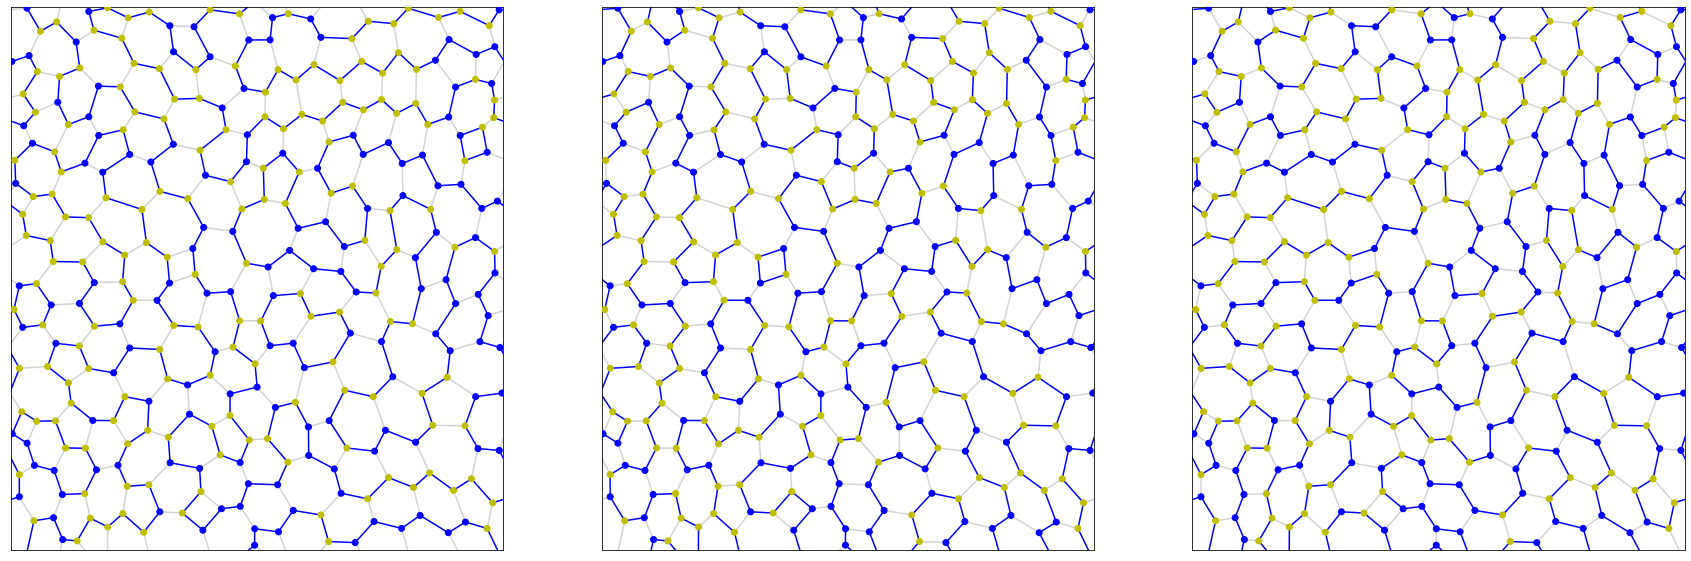

In [8]:
fig3, axes3 = plt.subplots(1, 3, figsize=(30, 10))
for ax in axes3.flatten():
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

number = 0
pl.plot_lattice(
    lattice,
    ax=axes3[0],
    edge_labels=edge_colorings[coloring_to_plot],
    edge_color_scheme=["lightgrey", "b", "b", "lightgrey"],
    vertex_labels=vertex_diff[number],
    vertex_color_scheme=["b", "y", "w"],
)

pl.plot_lattice(
    lattice,
    ax=axes3[1],
    edge_labels=edge_colorings[coloring_to_plot],
    edge_color_scheme=["b", "lightgrey", "b", "lightgrey"],
    vertex_labels=vertex_diff[number],
    vertex_color_scheme=["b", "y", "w"],
)

pl.plot_lattice(
    lattice,
    ax=axes3[2],
    edge_labels=edge_colorings[coloring_to_plot],
    edge_color_scheme=["b", "b", "lightgrey", "lightgrey"],
    vertex_labels=vertex_diff[number],
    vertex_color_scheme=["b", "y", "w"],
)